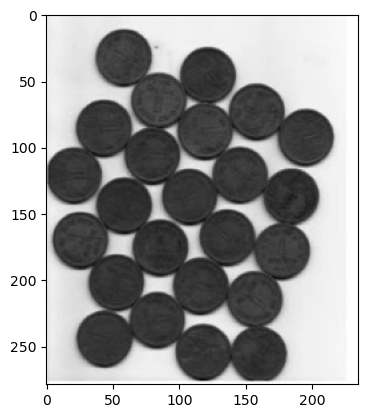

In [5]:
#import required library
import numpy as np
import cv2 as cv 
from matplotlib import pyplot as plt

img = cv.imread('[Dataset] Module 20 images/Many_Coins.png')
#cv.imshow('sample_image',img)
gray = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

In [6]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh=cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2.imshow('thresh_img',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

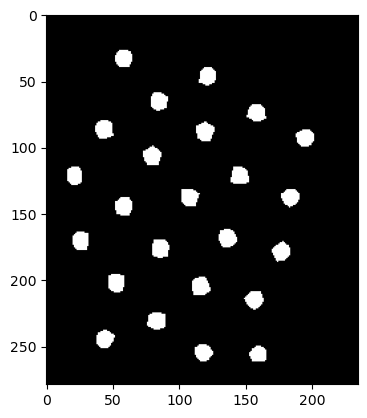

In [9]:
#noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

#sure background area
sure_bg = cv.dilate(opening, kernel, iterations=3)

#finding sure foreground area
dist_transform=cv.distanceTransform(opening, cv.DIST_L2,5)

ret,sure_fg=cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

#finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_fg, sure_bg)


#cv.imshow('unknown_img',sure_bg)
#cv.imshow('unknown_img',sure_fg)
#plt.imshow(sure_bg, cmap = 'gray')
plt.imshow(sure_fg, cmap = 'gray')
cv.waitKey(0)
cv.destroyAllWindows()

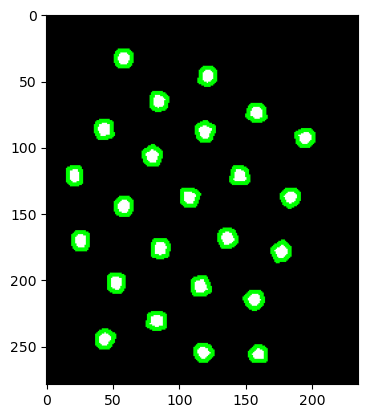

In [12]:
(cnt, heirarchy) = cv2.findContours(sure_fg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(sure_fg.copy(), cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)

In [13]:
print('There are {}  coins in the image'.format(len(cnt)))
plt.show()

There are 24  coins in the image


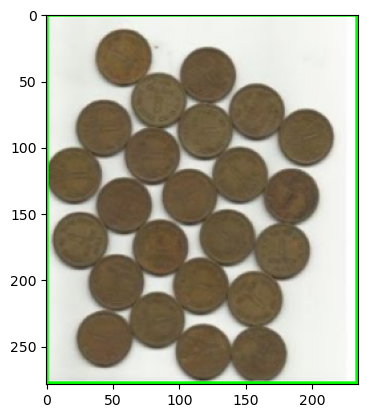

In [19]:
print('There are {}  coins in the image'.format(len(cnt)))

There are 1  coins in the image


In [7]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

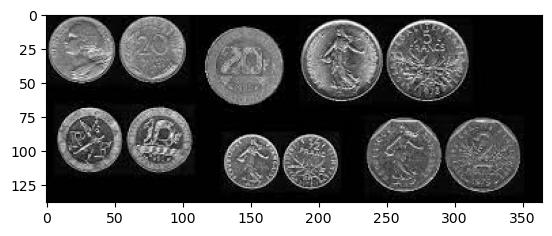

In [8]:
image = cv2.imread("[Dataset] Module 20 images/coin.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')


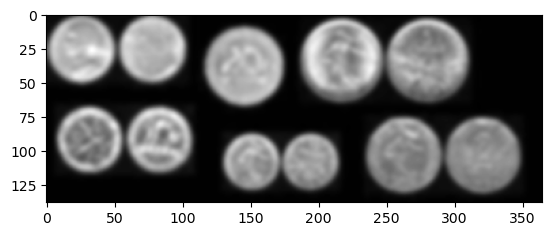

In [9]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap = 'gray')

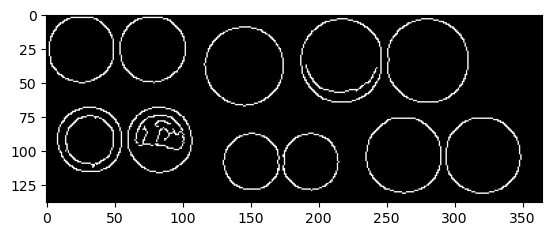

In [10]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap = 'gray')

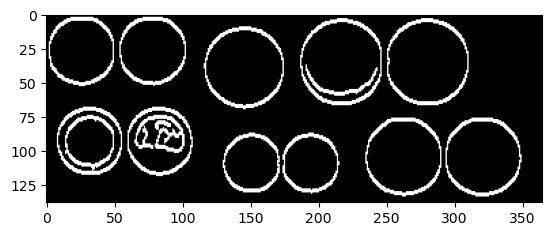

In [11]:
dilated = cv2.dilate(canny, (1, 1), iterations = 2)
plt.imshow(dilated, cmap = 'gray')

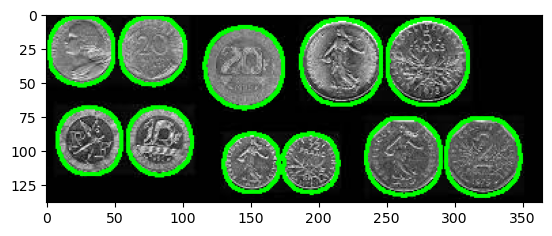

In [12]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)

In [13]:
print('There are {}  coins in the image'.format(len(cnt)))
plt.show()

There are 11  coins in the image


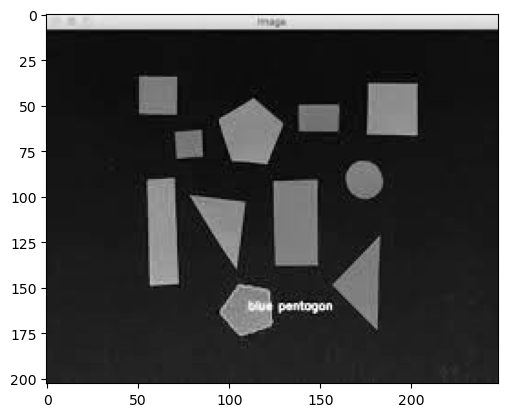

In [24]:
image = cv2.imread('[Dataset] Module 20 images/colorImage-1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');